# Welcome to My Notebook


# In this notebook we are going to predict the class of Date Fruit with help of various Input Features.

In [9]:
# import all the necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score

import warnings 
warnings.filterwarnings("ignore")

In [10]:
# Read the dataset
dataframe= pd.read_excel("/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")
dataframe.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [11]:
# dataframe info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [12]:
# describe the dataset
dataframe.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [13]:
# Check the duplicate values in the dataset
dataframe.duplicated().sum()

0

In [14]:
# Check Is there any null values in the dataset
dataframe.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [15]:
dataframe.shape

(898, 35)

# Check the dataset is balanced or not

In [16]:
dataframe.Class.value_counts()

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='Class'>

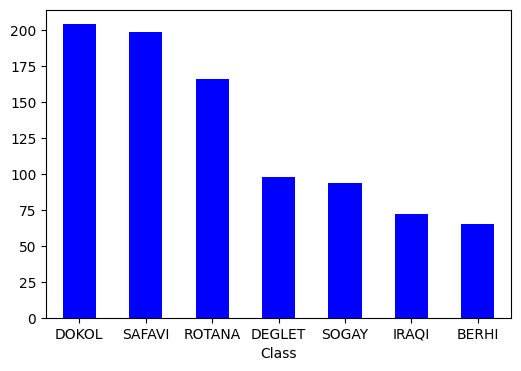

In [17]:
dataframe["Class"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="Blue")

# Lets see the Data Distribution of all the columns

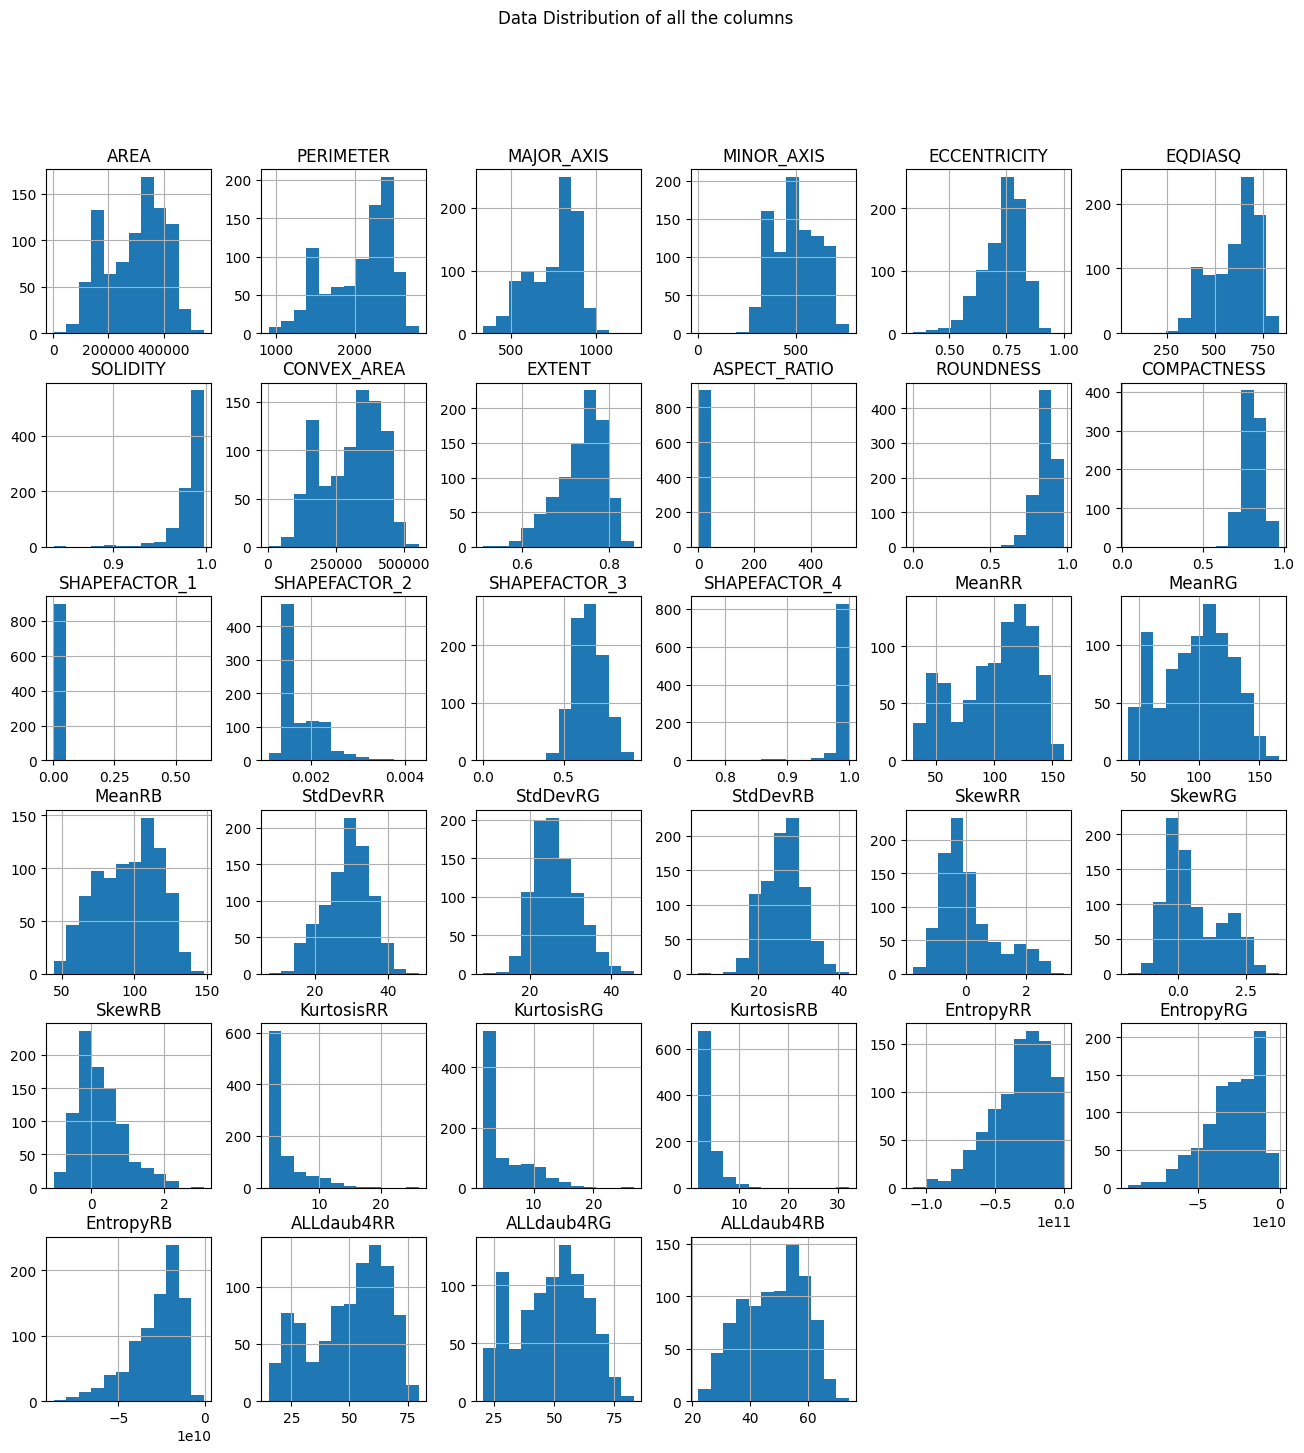

In [18]:
dataframe.hist(bins=12, figsize=(16,16), grid=True)
plt.suptitle("Data Distribution of all the columns")
plt.show()

# Lets Detect Outliers Using Box Plot
Here we can only see the outliers in the feature names[Area, Perimeter, Major_axis, Minor_axis, Solidity, Convex_area, eccentricity, Compacteness and Roundness]

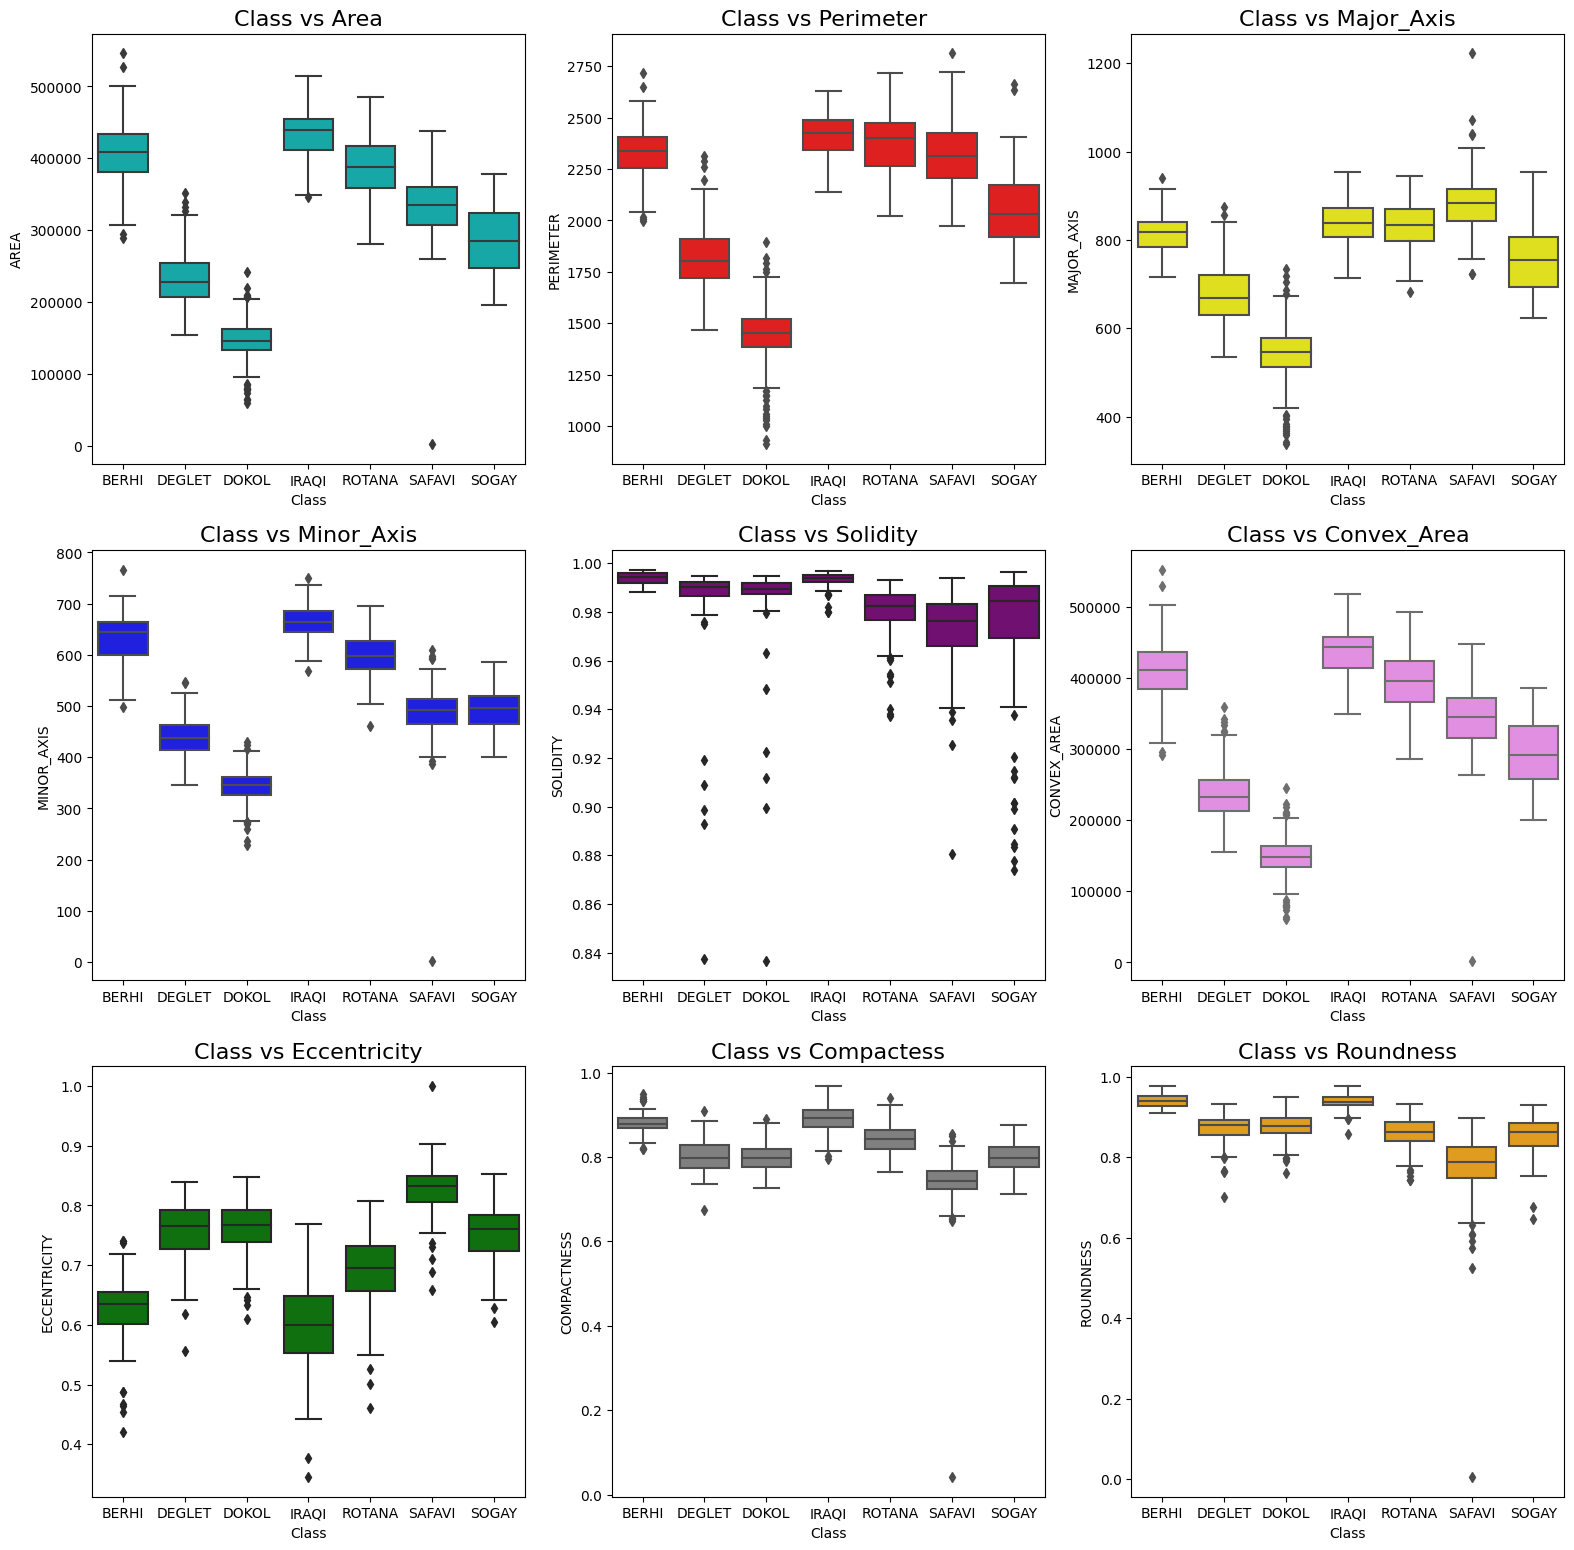

In [19]:
fig=plt.figure(figsize=(19,19))

ax=fig.add_subplot(331)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["AREA"], hue=None ,color='c',ax=ax)
ax.set_title('Class vs Area', fontsize=16)

ax=fig.add_subplot(332)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["PERIMETER"], hue=None ,color='red',ax=ax)
ax.set_title('Class vs Perimeter ', fontsize=16)

ax=fig.add_subplot(333)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["MAJOR_AXIS"], hue=None ,color='yellow',ax=ax)
ax.set_title('Class vs Major_Axis', fontsize=16)

ax=fig.add_subplot(334)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["MINOR_AXIS"], hue=None ,color='blue',ax=ax)
ax.set_title('Class vs Minor_Axis', fontsize=16)

ax=fig.add_subplot(335)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["SOLIDITY"], hue=None ,color='purple',ax=ax)
ax.set_title('Class vs Solidity', fontsize=16)

ax=fig.add_subplot(336)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["CONVEX_AREA"], hue=None ,color='violet',ax=ax)
ax.set_title('Class vs Convex_Area', fontsize=16)

ax=fig.add_subplot(337)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["ECCENTRICITY"], hue=None ,color='green',ax=ax)
ax.set_title('Class vs Eccentricity', fontsize=16)

ax=fig.add_subplot(338)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["COMPACTNESS"], hue=None ,color='grey',ax=ax)
ax.set_title('Class vs Compactess', fontsize=16)

ax=fig.add_subplot(339)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["ROUNDNESS"], hue=None ,color='orange',ax=ax)
ax.set_title('Class vs Roundness', fontsize=16)


plt.show()

# Drop the columns that has Correlation equal to 1(Multicolinearity)

In [20]:
dataframe.drop(["PERIMETER","MAJOR_AXIS","MINOR_AXIS","CONVEX_AREA","MeanRR","ALLdaub4RR","EntropyRG"], axis=1, inplace=True)

# Divide the Dataset into Train and Test Set

In [21]:
def train_test_split_data(dataframe,target,test_size, random_state):
    x_train,x_test, y_train, y_test= train_test_split(dataframe.drop([target], axis=1),
                                                      dataframe[target],
                                                      test_size=test_size,
                                                      random_state=random_state,
                                                      stratify=dataframe[target]
                                                      )
    
    return x_train,x_test, y_train, y_test

In [22]:
x_train,x_test, y_train, y_test= train_test_split_data(dataframe,target="Class",test_size=0.3, random_state=42)

In [23]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((628, 27), (270, 27), (628,), (270,))

# Get the Numerical and Categorical Columns list

In [24]:
def get_numerical_and_categorical_columns(dataframe):
    
    numerical_cols = []
    categorical_cols = []
    for column in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            numerical_cols.append(column)
        else:
            categorical_cols.append(column)
            
    return numerical_cols, categorical_cols

In [25]:
 numerical_cols, categorical_cols=get_numerical_and_categorical_columns(dataframe)

# Lets Detect the outliers in the Training Data And Remove it

In [26]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)
        
        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos) 
                
    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)
    
    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Ratio of outliers
    x_train.drop(x_train.index[outliers], inplace=True)    # remove the outliers from the training dataset
    y_train.drop(y_train.index[outliers], inplace=True)
    
    
    
    return ratio, x_train, y_train

In [27]:
ratio_of_outliers,x_train,y_train= Winsorization_Method(numerical_cols, x_train, y_train, a=0.2, b=99.2)

In [28]:
ratio_of_outliers

14.81

In [29]:
x_train.shape, y_train.shape

((535, 27), (535,))

# Data Preprocessing
1. All the features are numerical except the calss, Lets do the Numerical Encoding for numerical features
2. And for class feature use the Categorical Encoding

# Numerical Encoding (Using Robust Scaler)

In [30]:
robust_scaler= RobustScaler()
x_train=robust_scaler.fit_transform(x_train)
x_test=robust_scaler.transform(x_test)

# Lets do the Label Encoding on Target Variable

In [31]:
le = LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

# Modelling

In [32]:
def modelling(x_train, x_test, y_train, y_test):
    # create the empty list to store the results 
    precision=[]
    recall=[]
    f1=[]


    # Lets create the list of models
    models=[LogisticRegression(),
    GaussianNB(),
    SVC(kernel="linear"),
    KNeighborsClassifier(n_neighbors=32),
    DecisionTreeClassifier(criterion="gini"),
    RandomForestClassifier(n_estimators=200,criterion="gini"),
    XGBClassifier()
     ]

    # Let iterate over the list of models and train and predict it
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        precision.append(precision_score(y_test, y_pred,average="micro"))
        recall.append(recall_score(y_test, y_pred, average="micro"))
        f1.append(f1_score(y_test, y_pred, average="micro"))



    model_names = ['LogisticRegression','GaussianNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
    result_df = pd.DataFrame({'Recall':recall, 'Precision':precision, 'F1_Score':f1},index=model_names)
    result_df=result_df.sort_values(by="Recall", ascending=False)
    return result_df

In [33]:
result_df= modelling(x_train, x_test, y_train, y_test)
result_df

,Recall,Precision,F1_Score
LogisticRegression,0.933333,0.933333,0.933333
GaussianNB,0.911111,0.911111,0.911111
SVC,0.907407,0.907407,0.907407
RandomForestClassifier,0.900000,0.900000,0.900000
XGBClassifier,0.892593,0.892593,0.892593
KNeighborsClassifier,0.881481,0.881481,0.881481
DecisionTreeClassifier,0.792593,0.792593,0.792593


# Lets visualize the Result

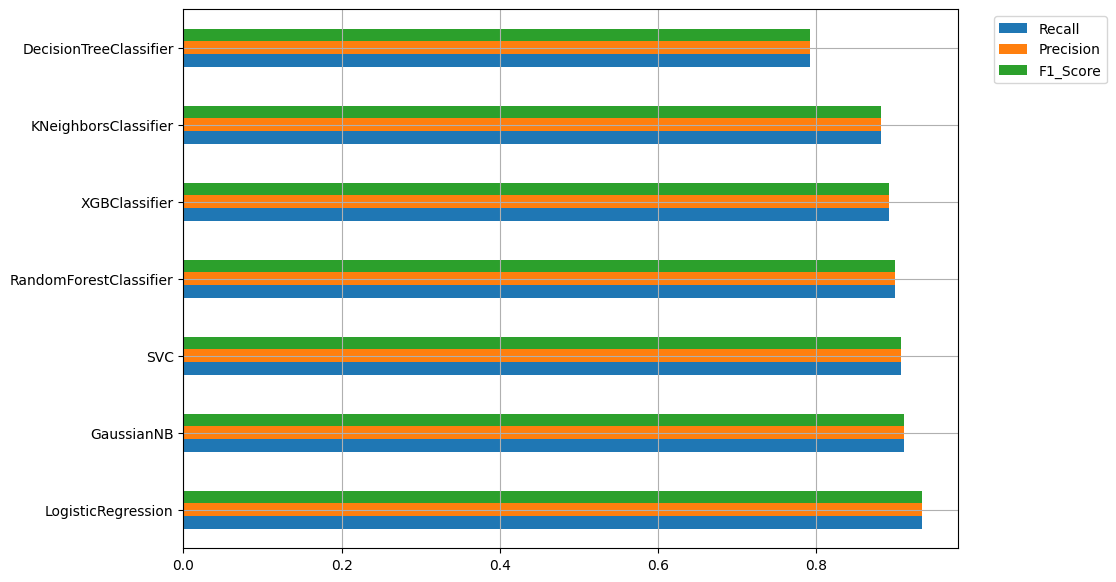

In [34]:
result_df.plot(kind="barh", figsize=(10, 7), grid=True).legend(bbox_to_anchor=(1.2,1));